<h1> <a href=http://www.datascience-paris-saclay.fr/>Paris Saclay Center for Data Science</a> </h1>

<h2> RAMP on qualitative and quantitative non-invasive monitoring of anti-cancer drugs </h2>

<i>Camille Marini (LTCI/CNRS), Alex Gramfort (LTCI/Télécom ParisTech), Sana Tfaili (Lip(Sys)²/UPSud), Laetitia Le (Lip(Sys)²/UPSud), Mehdi Cherti (LAL/CNRS), Balázs Kégl (LAL/CNRS)</i>

<h2> Introduction </h2>

<p>Chemotherapy is one of the most used treatment against cancer. It uses chemical substances (<a href=https://en.wikipedia.org/wiki/List_of_chemotherapeutic_agents>chemotherapeutic agents</a>) which kill cells that divide too quickly. These chemical substances are often diluted in a particular solution and packaged in bags, diffusers, or syringes, before being administered. <a href=https://books.google.fr/books?id=EB00rD8AqaYC&pg=PA188&lpg=PA188&dq=wrong+chemotherapeutic&source=bl&ots=m7EfyG6A3J&sig=ZVa0hLqDPFe2iExV6FOREJztN8c&hl=en&sa=X&ved=0ahUKEwj_5ZinkarMAhUFnBoKHaJiAgAQ6AEIKDAC#v=onepage&q=wrong%20chemotherapeutic&f=false>Wrong medication</a>  (wrong chemotherapeutic agent or wrong concentration) can have major impacts for patients. To prevent wrong medication, some recent French regulations impose the verification of anti-cancer drugs before their administration. The goal is to check that they contain the good chemotherapeutic agent with the good dosage. 

<p><a href=https://en.wikipedia.org/wiki/Raman_spectroscopy>Raman spectroscopy</a> could be used to make this check, since, theoretically, i) each molecule has a specific spectral fingerprint by which the molecule can be identified; and ii) the Raman intensity increases with the concentration of the molecule. The main advantage of spectroscopy above other methods (for example, liquid chromatography) is that it is non-destructive and non-invasive (measures are made without opening the drug containers). However, this method is rarely used in hospital environment because of the complexity of the spectral signals to analyze. Automating the analysis of these spectral signals could significantly help. Eventually, a complete analytical system (from measuring Raman spectra to identifying the chemotherapeutic agent and its concentration) could be designed, which would be easy to use and would prevent wrong medication. 

<p>In this context, the goal of this project is to develop prediction models able to <b>identify and quantify chemotherapeutic agents from their Raman spectra</b>.  

<p>The Lip(Sys)² laboratory measured Raman spectra of 4 types of chemotherapeutic agents (called <i>molecule</i>) in 3 different packages (called <i>vial</i>), diluted in 9 different solutions (called <i>solute gammes</i>), and having different concentrations. A total of <b>360 spectra were measured for each agent</b>, except for one (348 spectra).<br>  

Part of these data are saved in the file <code>train.csv</code> as follows (<code>n_samples</code> being the number of samples): 
<ul>
    <li><b>molecule</b>: Type of chemotherapeutic agent. Six possible values: A for infliximab, B for bévacizumab, Q for ramucirumab, R for rituximab. Dimension: (<code>n_samples</code>,)</li>
    <li><b>vial</b>: Vial type. Three possible values: 1, 2, 3. Dimension: (<code>1</code>, <code>n_samples</code>)</li>
    <li><b>solute</b>: Solute group. Fourteen possible values: 1, 2, ..., 14. Dimension: (<code>1</code>, <code>n_samples</code>)</li>
    <li><b>concentration</b>: Concentration of the molecule. Dimension: (<code>n_samples</code>, <code>1</code>)</li>
    <li><b>spectra</b>: Intensity of Raman spectrum. Dimension: (<code>n_samples</code>, <code>1866</code>)</li>
</ul>

<p>To sum up, there are too objectives:

<ul>
    <li><b>classification</b>: predict which molecule it corresponds to given the spectrum.</li>
    <li><b>regression</b>: predict the concentration of a molecule. The prediction should not depend on the vial or the solute group. The error metric is the mean absolute relative error (mare): $$\frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}\left|\frac{y_i-\hat{y}_i}{y_i}\right|$$ with $y$ and $\hat{y}$ being the true and predicted concentration.</li>
</ul>

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.17.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory data analysis

### Loading the data

In [33]:
data = pd.read_csv('train.csv')

y_df = data[['molecule', 'concentration']]
X_df = data.drop(['molecule', 'concentration'], axis=1)
spectra = X_df['spectra'].values                                        
spectra = np.array([np.array(dd[1:-1].split(',')).astype(float) for dd in spectra])    
X_df['spectra'] = spectra.tolist()

In [34]:
print(X_df[:10])

   solute                                            spectra  vial
0      11  [0.0152963, 0.0152944, 0.0153142, 0.0154096, 0...     1
1       1  [0.0143634, 0.0143292, 0.0143999, 0.0145162, 0...     1
2       3  [0.0163027, 0.0161848, 0.0163573, 0.0164119, 0...     1
3      10  [0.0135833, 0.0135537, 0.0134438, 0.0136424, 0...     2
4       2  [0.020811, 0.020767, 0.0208674, 0.0207018, 0.0...     3
5       4  [0.0273853, 0.0271442, 0.0273076, 0.0272756, 0...     1
6       5  [0.016065, 0.0161625, 0.0161815, 0.0162885, 0....     3
7       9  [0.0225653, 0.0226097, 0.0222985, 0.0224744, 0...     2
8       1  [0.0145261, 0.014045, 0.0144388, 0.0143233, 0....     3
9       1  [0.0139963, 0.0143121, 0.0143192, 0.0140011, 0...     3


In [35]:
print(y_df[:10])

  molecule  concentration
0        Q           8000
1        B            500
2        B           2000
3        A           2000
4        B          10000
5        B          25000
6        R           2000
7        R          10000
8        A            400
9        A           1000


In [36]:
print(spectra[:10])

[[ 0.0152963  0.0152944  0.0153142 ...,  0.017305   0.0170706  0.0172018]
 [ 0.0143634  0.0143292  0.0143999 ...,  0.018519   0.0186104  0.0187633]
 [ 0.0163027  0.0161848  0.0163573 ...,  0.017772   0.0179032  0.0175998]
 ..., 
 [ 0.0225653  0.0226097  0.0222985 ...,  0.015526   0.015441   0.015501 ]
 [ 0.0145261  0.014045   0.0144388 ...,  0.0189565  0.0187539  0.0188979]
 [ 0.0139963  0.0143121  0.0143192 ...,  0.018879   0.0188744  0.0184187]]


In [37]:
type(data['spectra'].values[0])

str

In [38]:
print(X_df.head())
print(y_df.head())

   solute                                            spectra  vial
0      11  [0.0152963, 0.0152944, 0.0153142, 0.0154096, 0...     1
1       1  [0.0143634, 0.0143292, 0.0143999, 0.0145162, 0...     1
2       3  [0.0163027, 0.0161848, 0.0163573, 0.0164119, 0...     1
3      10  [0.0135833, 0.0135537, 0.0134438, 0.0136424, 0...     2
4       2  [0.020811, 0.020767, 0.0208674, 0.0207018, 0.0...     3
  molecule  concentration
0        Q           8000
1        B            500
2        B           2000
3        A           2000
4        B          10000


In [39]:
# Loading wavenumbers
freqs = pd.read_csv('freq.csv')
freqs = freqs['freqs'].values
print(freqs.shape, spectra.shape)
print(freqs[:100])

(1866,) (999, 1866)
[ 400.095  402.626  405.155  407.684  410.212  412.74   415.266  417.792
  420.315  422.839  425.362  427.885  430.406  432.927  435.447  437.966
  440.484  443.     445.517  448.032  450.547  453.061  455.575  458.086
  460.597  463.108  465.618  468.126  470.634  473.141  475.648  478.153
  480.658  483.162  485.665  488.166  490.668  493.169  495.668  498.167
  500.666  503.162  505.659  508.154  510.649  513.143  515.635  518.128
  520.619  523.11   525.599  528.089  530.576  533.064  535.551  538.036
  540.521  543.005  545.487  547.97   550.451  552.932  555.412  557.892
  560.369  562.847  565.323  567.799  570.275  572.748  575.221  577.694
  580.166  582.637  585.107  587.576  590.044  592.512  594.979  597.444
  599.911  602.375  604.838  607.3    609.763  612.224  614.684  617.143
  619.602  622.061  624.517  626.973  629.429  631.883  634.337  636.791
  639.243  641.694  644.145  646.594]


In [40]:
# Types of molecules
np.unique(y_df['molecule'].values)

array(['A', 'B', 'Q', 'R'], dtype=object)

In [41]:
# Target for classification
molecule = y_df['molecule'].values
# Target for regression
concentration = y_df['concentration'].values
# "Raw" features
X = spectra

In [42]:
X.shape

(999, 1866)

In [43]:
X.T

array([[ 0.0152963,  0.0143634,  0.0163027, ...,  0.019496 ,  0.0173912,
         0.0167408],
       [ 0.0152944,  0.0143292,  0.0161848, ...,  0.0195301,  0.0178033,
         0.016743 ],
       [ 0.0153142,  0.0143999,  0.0163573, ...,  0.0193758,  0.0173978,
         0.0165654],
       ..., 
       [ 0.017305 ,  0.018519 ,  0.017772 , ...,  0.0160981,  0.0170894,
         0.0174375],
       [ 0.0170706,  0.0186104,  0.0179032, ...,  0.0162023,  0.0170807,
         0.0173088],
       [ 0.0172018,  0.0187633,  0.0175998, ...,  0.0161263,  0.0169723,
         0.0173755]])

In [13]:
molecule[:100]

array(['Q', 'B', 'B', 'A', 'B', 'B', 'R', 'R', 'A', 'A', 'R', 'B', 'R',
       'B', 'Q', 'Q', 'R', 'A', 'Q', 'B', 'Q', 'B', 'R', 'R', 'Q', 'R',
       'B', 'Q', 'Q', 'Q', 'B', 'R', 'A', 'A', 'A', 'B', 'A', 'R', 'B',
       'A', 'A', 'B', 'B', 'Q', 'A', 'R', 'B', 'Q', 'A', 'A', 'Q', 'B',
       'Q', 'R', 'R', 'Q', 'R', 'A', 'Q', 'Q', 'B', 'R', 'R', 'B', 'Q',
       'A', 'B', 'R', 'Q', 'A', 'A', 'R', 'B', 'A', 'R', 'B', 'R', 'B',
       'B', 'A', 'A', 'R', 'R', 'B', 'A', 'A', 'B', 'B', 'B', 'R', 'Q',
       'A', 'B', 'B', 'Q', 'A', 'B', 'Q', 'A', 'A'], dtype=object)

In [14]:
concentration[:100]

array([ 8000,   500,  2000,  2000, 10000, 25000,  2000, 10000,   400,
        1000, 10000,   500, 10000, 10000,  6000,  3000,  4000,   600,
        4000, 10000,  7000,  1500,  4000,  1600,  1000,  1000,  1500,
        2000,  2000,  9000, 20000,  1000, 10000,   400,  5000,  2000,
         400,  4000,  7000,   800,   400,  1500,  2000,  6000,  5000,
       10000, 25000, 10000,  1400,   800, 10000, 20000,  1000,  1200,
         800,  2000, 10000,   800,  6000,  6000,  5000,  4000,  1200,
        2000,  3000,  1600,  5000,  1000,  3000,   300,  2000,  4000,
       25000, 10000,  2000,  7000,  3000,  5000, 25000,  1000,   600,
       10000,  1000,  1000,   400, 10000, 20000,  1000,  4000,  1600,
       10000,   600, 25000, 20000,  7000,   600,  7000,  5000,   600,  1400])

### Some plots

#### Raman spectra

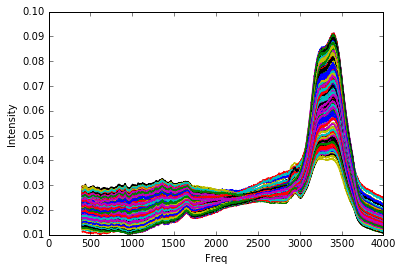

In [16]:
plt.plot(freqs, spectra.T)
plt.xlabel('Freq')
plt.ylabel('Intensity')

#### Comment about Raman spectra on the dataset:

Raman spectroscopy provides information about molecular vibrations that can be used for sample identification and quantitation of chemotherapeutic agents which is used to construct the predicted models - our target. Based on the image above, there are the scattered lights of the same frequency which has differents colours.

#### Distribution of concentrations

There are 21 different values of concentrations.


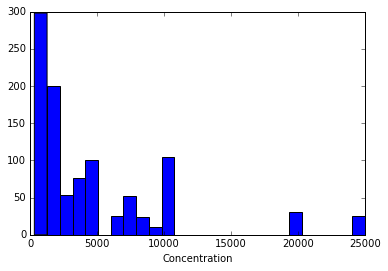

In [17]:
plt.hist(concentration, bins=26)
plt.xlabel('Concentration')
print("There are %s different values of concentrations." % np.unique(concentration).size)

[  300   400   600   800  1000  1400  1600  2000  5000 10000]
[  500  1000  1500  2000  4000  5000  7000 10000 20000 25000]
[ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000]
[  400   800  1000  1200  1600  2000  3000  4000  5000 10000]


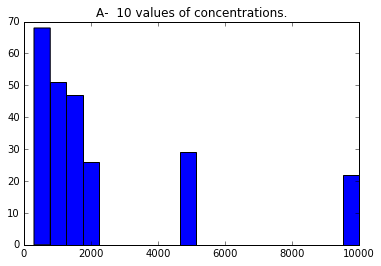

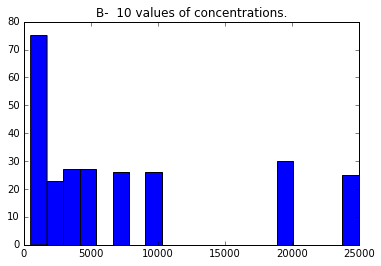

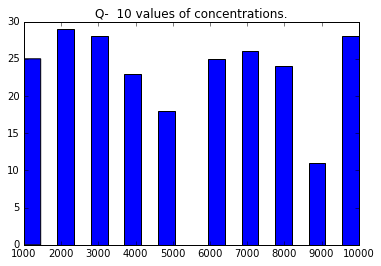

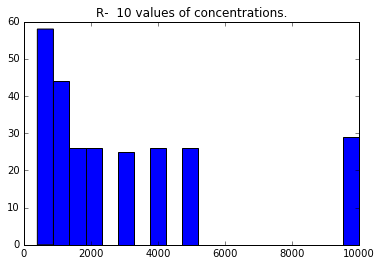

In [18]:
for mol in np.unique(molecule):
    plt.figure()
    plt.hist(concentration[molecule == mol], bins=20)
    plt.title(mol + "-  %s values of concentrations."
              % np.unique(concentration[molecule == mol]).size)
    print(np.unique(concentration[molecule == mol]))

#### Comment about the concentration distribution of molecule:

The distributions of each type of molecule are quite complexe, not so clear about their distributions.

#### Proportion of molecules

Number of samples: 999


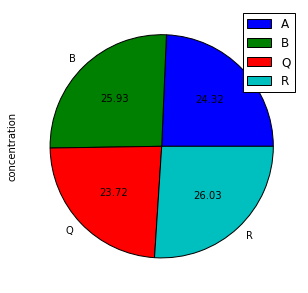

In [19]:
print('Number of samples: %s' % len(y_df))
y_df.groupby('molecule').count().plot(y='concentration', kind='pie', autopct='%.2f', figsize=(5, 5));

#### Proportion of solute groups and vial group

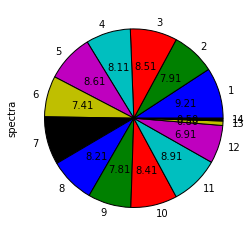

In [20]:
X_df.groupby('solute').count().plot(y='spectra', kind='pie', autopct='%.2f', figsize=(4, 4), legend=None);

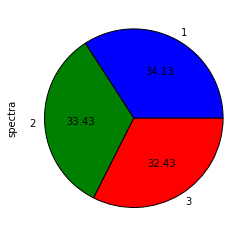

In [21]:
X_df.groupby('vial').count().plot(y='spectra', kind='pie',  autopct='%.2f', figsize=(4, 4), legend=None)

#### Mean Raman spectra for each concentration value

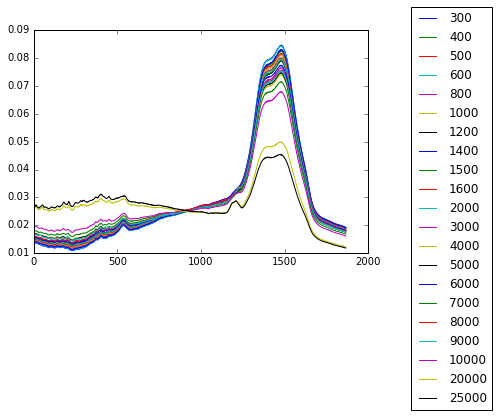

In [22]:
for c in np.unique(concentration):
    plt.plot(np.mean(X[concentration == c, :], axis=0), label="%s" % c)

plt.legend(bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure);

#### Comment:

The concentration distributions seem like Gaussian distribution, that can helps us to generate the model in the following steps.

#### Raman spectra for each type of molecule

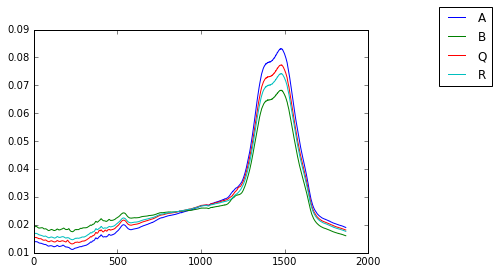

In [23]:
# Mean Raman spectra for each type of molecule
for mol in np.unique(molecule):
    plt.plot(np.mean(X[molecule == mol, :], axis=0), label="%s" % mol)

plt.legend(bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure);

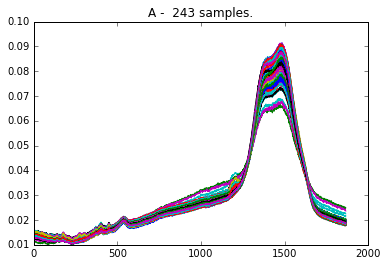

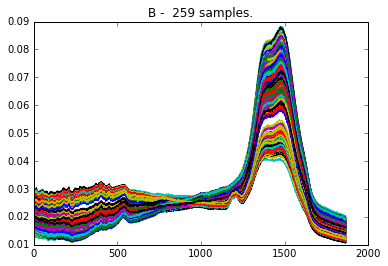

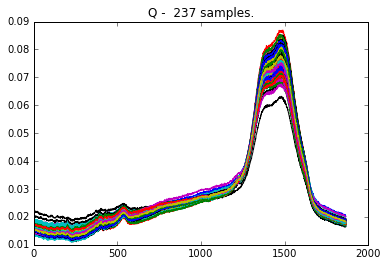

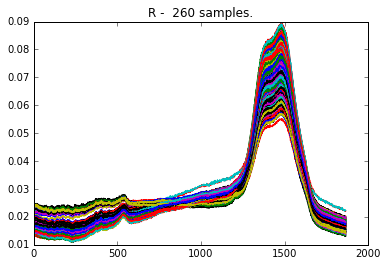

In [24]:
# For each molecule
for mol in np.unique(molecule):
    plt.figure()
    plt.plot(X[molecule == mol, :].T)
    plt.title(mol + " -  %s samples." % X[molecule == mol, :].shape[0]);

## Discuss the target:

So ideally, the target of this problem is to minimize the combination error between the error of molecule and the mean absolute relative error of the concentration of a molecule. Based on their relations and with the coefficients respectively 2/3 and 1/3, we try to minimize the error between true and predicted value of molecule as much as possible. So the changement of parameters such as number of components or estimators... will change the results because as small as the sample we have tested, the probability of increasing these errors will be reduced. However, choosing not enough the number of sample to be test will increase the risk of default, so all the parameters will be modified at the end.

### Feature extractor for classification

In [25]:
import numpy as np
import pandas as pd

class FeatureExtractorClf(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_df):
        pass
    
    def transform(self, X_df):
        XX = np.array([np.array(dd) for dd in X_df['spectra']])
        return XX

### Classification: predicting the molecule type

So far I have worked on 2 different approaches to minimize the errors. The first one I have used is a model that contains many kinds of decompositions than the example, that are "built in". The idea is basically diversifying appropriated statistical algorithms to describe variabilities among the observed value will be more efficient than just using invidually one method with the same number of components. However, how to choose the most suitable methods is a top question. The second one will be the combination of FastICA and Support Vector Classification.

#### First approach: Diversify the compositions

I have chosen GradientBoostingClassifier among several classification method in scikitlearn package. Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. As we have all known, boosting is usually considered more efficient than bagging algorithm that just deal with the high variance in the model since it controls both bias and variance, then in this case, BaggingClassifier will be eliminated. Based on my experiences, GradientBoostingClassifier have worked very well in many cases among the others. After several tests in comparison with the other methods, this method was chosen.

Furthermore, to combine many kind of compositions in model, I use pipeline FeatureUnion to union all appropriated analysis methods. So there are some considerations about the algorithms:

- Kernel PCA: no nonlinear optimization is involved, we only need to solve an Eigenvalue problem as in the case of standard PCA. Therefore  we are not in danger of getting trapped in local minima during training.
- FastICA: the convergence is only linear, means a very fast convergence. The algorithm finds directly independent components of any non-Gaussian distribution using any nonlinearity (the distribution of molecule I assumed follows law Gaussian). It is parallel, distributed, computationally simple.
- Non negative matrix factorization: sparsity and nonnegativity; the factorization maintains these properties of the original matrix.

In [26]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


from sklearn.decomposition import NMF
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA
from sklearn.decomposition import SparsePCA

from sklearn.ensemble import GradientBoostingClassifier

class Classifier(BaseEstimator):
    def __init__(self):  
        self.clf = Pipeline([
                ('feature',FeatureUnion(n_jobs=1, 
                           transformer_list=[('fal', FactorAnalysis(n_components=10)),
                                            ('ica', FastICA(n_components=10)),
                                            ('nmf',NMF(n_components=10)),
                                            ('kernel_pca',KernelPCA(n_components=10)),
                                            ('sparePCA',SparsePCA(n_components=10))
                                            ],
                           transformer_weights=None)),
                ('gbf', GradientBoostingClassifier(n_estimators=300, random_state=42))
               ])
    def fit(self,X,y):
        self.clf.fit(X,y)
        
    def predict(self,X):
        return self.clf.predict(X)
    
    def predict_proba(self,X):
        return self.clf.predict_proba(X)

In [27]:
from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import KFold

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, zero_one_loss

labels = np.array(['A', 'B', 'Q', 'R'])

def train_test_model_clf(X_df, y_df, skf_is, FeatureExtractor, Classifier):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy()                                  
    y_train_df = y_df.iloc[train_is].copy()
    y_train_clf = y_train_df['molecule'].values
    X_test_df = X_df.iloc[test_is].copy()                                    
    y_test_df = y_df.iloc[test_is].copy() 
    y_test_clf = y_test_df['molecule'].values 
    # Feature extraction
    fe_clf = FeatureExtractor()
    fe_clf.fit(X_train_df, y_train_df)
    X_train_array_clf = fe_clf.transform(X_train_df)
    X_test_array_clf = fe_clf.transform(X_test_df)
    # Train
    clf = Classifier()
    clf.fit(X_train_array_clf, y_train_clf)
    # Test 
    y_proba_clf = clf.predict_proba(X_test_array_clf)                        
    y_pred_clf = labels[np.argmax(y_proba_clf, axis=1)]                      
    error = 1 - accuracy_score(y_test_clf, y_pred_clf)
    error1 = zero_one_loss(y_test_clf, y_pred_clf)
    print('error = %s' % error)
    print('error1 = %s' % error1)
    print('classification report:\n %s' % classification_report(y_test_clf, y_pred_clf))
    print('confusion matrix:\n %s' % confusion_matrix(y_test_clf, y_pred_clf))


skf = ShuffleSplit(n_splits=2, test_size=0.2, random_state=57)
skf_is = list(skf.split(X_df))[0]

train_test_model_clf(X_df, y_df, skf_is, FeatureExtractorClf, Classifier)

error = 0.04
error1 = 0.04
classification report:
              precision    recall  f1-score   support

          A       0.98      0.97      0.98        63
          B       0.93      0.96      0.95        45
          Q       1.00      0.97      0.99        40
          R       0.92      0.94      0.93        52

avg / total       0.96      0.96      0.96       200

confusion matrix:
 [[61  0  0  2]
 [ 1 43  0  1]
 [ 0  0 39  1]
 [ 0  3  0 49]]


One of the biggest limitation of this model is the unstable error. The value changes from 0.03-0.045, that will affect to the relative errors following. Even though the errors was reduced significantly in comparison with the initial example value, but this default need to be considered more. That's why the second approach can be presented.

#### Second approach: combination between decomposition FastICA and Support Vector Classification

As I have mentioned above, FastICA has the most advantage of neutral algorithms. Based on its advantages, this method was chosen. SVC will help to avoid the overfitting, SVC provides a good out-of-sample generalization, if the parameters C and r (in the case of a Gaussian kernel) are appropriately chosen. This means that, by choosing an appropriate generalization grade, SVCs can be robust, even when the training sample has some bias.

In [517]:
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

class Classifier(BaseEstimator):
    def __init__(self):
        self.n_components = 10
        self.clf = Pipeline([
            ('fastICA', FastICA(n_components=self.n_components)),
            ('svc', SVC(C = 100, gamma = 8, probability = True))
        ])

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

In [30]:
from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import KFold

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, zero_one_loss

labels = np.array(['A', 'B', 'Q', 'R'])

def train_test_model_clf(X_df, y_df, skf_is, FeatureExtractor, Classifier):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy()                                  
    y_train_df = y_df.iloc[train_is].copy()
    y_train_clf = y_train_df['molecule'].values
    X_test_df = X_df.iloc[test_is].copy()                                    
    y_test_df = y_df.iloc[test_is].copy() 
    y_test_clf = y_test_df['molecule'].values 
    # Feature extraction
    fe_clf = FeatureExtractor()
    fe_clf.fit(X_train_df, y_train_df)
    X_train_array_clf = fe_clf.transform(X_train_df)
    X_test_array_clf = fe_clf.transform(X_test_df)
    # Train
    clf = Classifier()
    clf.fit(X_train_array_clf, y_train_clf)
    # Test 
    y_proba_clf = clf.predict_proba(X_test_array_clf)                        
    y_pred_clf = labels[np.argmax(y_proba_clf, axis=1)]                      
    error = 1 - accuracy_score(y_test_clf, y_pred_clf)
    error1 = zero_one_loss(y_test_clf, y_pred_clf)
    print('error = %s' % error)
    print('error1 = %s' % error1)
    print('classification report:\n %s' % classification_report(y_test_clf, y_pred_clf))
    print('confusion matrix:\n %s' % confusion_matrix(y_test_clf, y_pred_clf))


skf = ShuffleSplit(n_splits=2, test_size=0.2, random_state=57)
skf_is = list(skf.split(X_df))[0]

train_test_model_clf(X_df, y_df, skf_is, FeatureExtractorClf, Classifier)

error = 0.04
error1 = 0.04
classification report:
              precision    recall  f1-score   support

          A       0.98      0.95      0.97        63
          B       0.93      0.96      0.95        45
          Q       1.00      1.00      1.00        40
          R       0.92      0.94      0.93        52

avg / total       0.96      0.96      0.96       200

confusion matrix:
 [[60  0  0  3]
 [ 1 43  0  1]
 [ 0  0 40  0]
 [ 0  3  0 49]]


After tuning the model, we obtained a stable value of error which equals to 0.025. 

In [32]:
y_train_clf = y_train_df['molecule'].values

NameError: name 'y_train_df' is not defined

### Feature extractor for regression

Similarly to the feature extractor for classification, the feature extractor for regression should be implemented by a function <code>transform</code> and be part of the <code>FeatureExtractorReg</code> class, saved in the file <code>feature_extractor_reg.py</code>.  
<code>transform</code> receives the pandas dataframe <code>X_df</code> defined at the beginning of the notebook. The dataframe is augmented by four columns. At train time these columns contain the one-hot encoded molecule type; at test time, it receives the class posteriors. In this way you can use the classification information in the feature extractor of the regressor. The feature extractor should produce a numpy array representing the features extracted, which would be used for the regression.

In the example below, the features extracted are the molecule types and the standardized Raman spectra.

In [24]:
labels = np.array(['A', 'B', 'Q', 'R'])

class FeatureExtractorReg(object):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass
    
    def transform(self, X_df):                                                   
        XX = np.array([np.array(dd) for dd in X_df['spectra']])                  
        XX -= np.median(XX, axis=1)[:, None]                                     
        XX /= np.sqrt(np.sum(XX ** 2, axis=1))[:, None]                          
        XX = np.concatenate([XX, X_df[labels].values], axis=1)                   
        return XX   

### Regression: predicting the concentration

The regressor follows a classical scikit-learn regressor template. It should be saved in the file <code>regressor.py</code>. In its simplest form it takes a scikit-learn pipeline and assignes it to <code>self.reg</code> in <code>__init__</code>.  

In the example below, one model is created for each type of molecule

As mentionned above, the error metric is the mean absolute relative error (mare): $$\frac{1}{n_{samples}}\sum_{k=1}^{n_{samples}}\left|\frac{y-\hat{y}}{y}\right|$$ with $y$ and $\hat{y}$ being the true and predicted concentration.

In this stage, I prefer to apply the first approach to compute the regression which means I will choose several decompositions into the model.

#### Parameter tunning for GradienBossting

Though, GBM is robust enough to not overfit with increasing trees, but a high number for a particular learning rate can lead to overfitting. But as we reduce the learning rate and increase trees, the computation becomes expensive and would take a long time to run on standard personal computers.

- Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems, in this case, I have chosen this rate equals to 0.08.
- Lower the learning rate and increase the estimators proportionally to get more robust models.
- About the random_state, random_state, this is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.It can potentially result in overfitting to a particular random sample selected. In this case, I chose random_state = 50.

In [498]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA
from sklearn.decomposition import SparsePCA

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator                                           
import numpy as np                                                               
                                                                                                                                                                  
class Regressor(BaseEstimator):                                                  
    def __init__(self):                                                          
        self.n_components = 10                                                  
        self.n_estimators = 200                                                  
        self.learning_rate = 0.08                                                 
        self.list_molecule = ['A', 'B', 'Q', 'R']                                
        self.dict_reg = {}                                                       
        for mol in self.list_molecule:                                           
            self.dict_reg[mol] = Pipeline([                                      
                ('feature',FeatureUnion(n_jobs=1, 
                           transformer_list=[('fal', FactorAnalysis(n_components=10)),
                                            ('ica', FastICA(n_components=10)),
                                            ('kernel_pca',KernelPCA(n_components=10)),
                                            ('sparePCA',SparsePCA(n_components=10))
                                            ],
                           transformer_weights=None)),                    
                ('reg', GradientBoostingRegressor(                               
                    n_estimators=self.n_estimators,                              
                    learning_rate=self.learning_rate,                           
                    random_state=50))                                            
            ])                                                                   
                                                                                 
    def fit(self, X, y):                                                         
        for i, mol in enumerate(self.list_molecule):                             
            ind_mol = np.where(np.argmax(X[:, -4:], axis=1) == i)[0]             
            XX_mol = X[ind_mol]                                                  
            y_mol = y[ind_mol].astype(float)                                     
            self.dict_reg[mol].fit(XX_mol, np.log(y_mol))                        
                                                                                 
    def predict(self, X):                                                        
        y_pred = np.zeros(X.shape[0])                                            
        for i, mol in enumerate(self.list_molecule):                             
            ind_mol = np.where(np.argmax(X[:, -4:], axis=1) == i)[0]             
            XX_mol = X[ind_mol].astype(float)                                    
            y_pred[ind_mol] = np.exp(self.dict_reg[mol].predict(XX_mol))         
        return y_pred  

In [511]:
def mare_score(y_true, y_pred):                                                  
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

def train_test_model(X_df, y_df, skf_is, FeatureExtractorClf, Classifier, FeatureExtractorReg, Regressor):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy()                                  
    y_train_df = y_df.iloc[train_is].copy()                                  
    X_test_df = X_df.iloc[test_is].copy()                                    
    y_test_df = y_df.iloc[test_is].copy()                                    
    y_train_clf = y_train_df['molecule'].values                              
    y_train_reg = y_train_df['concentration'].values                         
    y_test_clf = y_test_df['molecule'].values                                
    y_test_reg = y_test_df['concentration'].values                           

    # Classification
    fe_clf = FeatureExtractorClf()                     
    fe_clf.fit(X_train_df, y_train_df)                                       
    X_train_array_clf = fe_clf.transform(X_train_df)                         
    X_test_array_clf = fe_clf.transform(X_test_df)                           
                                                                                 
    clf = Classifier()                                            
    clf.fit(X_train_array_clf, y_train_clf)                                  
    y_proba_clf = clf.predict_proba(X_test_array_clf)                        
    y_pred_clf = labels[np.argmax(y_proba_clf, axis=1)]                      
    error = 1 - accuracy_score(y_test_clf, y_pred_clf)                       
    print('error = ', error)
    
    # Regression
    fe_reg = FeatureExtractorReg()                     
    for i, label in enumerate(labels):
        # For training, we use 
        X_train_df.loc[:, label] = (y_train_df['molecule'] == label)         
        X_test_df.loc[:, label] = y_proba_clf[:, i]                          
    fe_reg.fit(X_train_df, y_train_reg)                                      
    X_train_array_reg = fe_reg.transform(X_train_df)                         
    X_test_array_reg = fe_reg.transform(X_test_df)                           
                                                                                 
    reg = Regressor()                                              
    reg.fit(X_train_array_reg, y_train_reg)                               
    y_pred_reg = reg.predict(X_test_array_reg)
    mare = mare_score(y_test_reg, y_pred_reg)
    print('mare = ', mare)                
    print('combined error = ', 2. / 3 * error + 1. / 3 * mare)


skf = ShuffleSplit(n_splits=2, test_size=0.2, random_state=57) 
skf_is = list(skf.split(X_df))[0]

train_test_model(X_df, y_df, skf_is, FeatureExtractorClf, Classifier, FeatureExtractorReg, Regressor)

error =  0.025
mare =  0.115571650425
combined error =  0.0551905501417


Then after applying the combination of first and second approach, I obtain the best result is approximately 0.055.

## Unit testing

You should use this notebook for preliminary analysis and visualization. Before submitting, you should make sure the code has no errors. First, copy-paste your four workflow elements into <code>feature_extractor_clf.py</code>, <code>feature_extractor_reg.py</code>, <code>classifier.py</code>, and <code>regressor.py</code>. Then execute the user_test_submission code, either in a separate terminal or below. You can also look at user_test_submission.py to see how we cross-validate and score your submissions. But don't modify it: its goal is to mimic what we do at our backend.

**If it runs and prints**   
<code>
Reading file ...
Training file ...
<verb>--------------------------</verb>
error =  [some_number_between_0_and_1]
mare =  [some_number_between_0_and_1]
combined error =  [some_number_between_0_and_1]
<verb>--------------------------</verb>
error =  [some_number_between_0_and_1]
mare =  [some_number_between_0_and_1]
combined error =  [some_number_between_0_and_1]
</code>
**you can submit the code.**

To run user_test_submission.py and test your code from the notebook you can do:

In [514]:
!python user_test_submission.py

Reading file ...
Training file ...
--------------------------
error = 0.025
mare =  0.126328469262
combined error =  0.0587761564207
--------------------------
error = 0.04
mare =  0.119556432293
combined error =  0.0665188107643


After running several time of testing model, the results was obtained in the period 0.058-0.066.